## Reading from file

In [2]:
file_path='G:\MYOWN\Oddcard2\education\Coursera\ML_Yandex\week2\sentences.txt'
with open(file_path, 'r') as f:
    origina_lines = f.readlines()

# TODO: read about built-in functions:
# https://docs.python.org/3/library/functions.html
# list comprehensions looks here better then map: 

lines=[l.lower() for l in origina_lines]
# lines=list(map(lambda x: x.lower(), lines))

## Tokenization

In [3]:
import re
tokenized_lines=[re.split('[^a-z]', s) for s in lines]

#Ohh, reduce is removed from Python3 built-ins:
#Removed reduce(). Use functools.reduce() if you really need it;
#however, 99 percent of the time an explicit for loop is more readable.

#Also:
#https://docs.python.org/3.0/whatsnew/3.0.html#views-and-iterators-instead-of-lists

#map() and filter() return iterators. If you really need a list, a quick fix is e.g. list(map(...)), ...

#in any case need to read whole listof changes from:
#https://docs.python.org/3.0/whatsnew/3.0.html

words=set()
for l in tokenized_lines:
    words.update(l)

if '' in words:
    words.remove('')

words_map = dict()
word_index = 0
words_list = []
for w in words:
    words_map[w] = word_index
    words_list.append(w)
    word_index += 1

## Matrix creation

In [4]:
import numpy as np

#tab for auto-completion
#shift-tab to see function args
#also print(np.array.__doc__) may be used, wo print it's hard to read
#or help(np.array) maybe used - it looks better for me

#help(np.zeros)

tokens_matrix = np.zeros((len(lines), len(words_map)), dtype=np.uint32)
for i in range(len(lines)):
    for t in tokenized_lines[i]:
        if t:
            token_index = words_map[t]
            tokens_matrix[i, token_index] += 1


### Matrix checking

In [5]:
for (i,),v in np.ndenumerate(tokens_matrix[0, :]):
    if v:
        #print((i,v))
        print(words_list[i])
print(lines[0])

the
have
in
to
domestication
major
undergone
cats
process
dogs
during
not
comparison
changes
in comparison to dogs, cats have not undergone major changes during the domestication process.



## Distance calculation

In [6]:
from scipy.spatial import distance
from operator import itemgetter
# help(distance.cosine)

first_line = tokens_matrix[0, :]

# method 1 using python only
distances = [distance.cosine(first_line, l) for l in tokens_matrix]
#print(distances)
# method 2 using np.apply_along_axis
distances2 = np.apply_along_axis(lambda l: distance.cosine(first_line, l), axis=1, arr=tokens_matrix)
#print(distances2)

dist_and_indexes = [(i,v) for (i,),v in np.ndenumerate(distances2)]

dist_and_indexes.sort(key=itemgetter(1), reverse=True)
#dist_and_indexes = sorted(dist_and_indexes, key=itemgetter(1), reverse=True)

#print(dist_and_indexes[:2])

sentence_numbers_answer = [n for (n,v) in dist_and_indexes[:2]]
print('First sentence:\n')
print(origina_lines[0] + '\n')
print('2 most similar by cosine distance:\n')
for n in sentence_numbers_answer:
    print(origina_lines[n])
#print(sentence_numbers_answer)

First sentence:

In comparison to dogs, cats have not undergone major changes during the domestication process.


2 most similar by cosine distance:

OS X Mountain Lion was released on July 25, 2012 for purchase and download through Apple's Mac App Store, as part of a switch to releasing OS X versions online and every year.

As cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.



## Save to file

In [7]:
out_file='G:\MYOWN\Oddcard2\education\Coursera\ML_Yandex\week2\submission-1.txt'
sentence_numbers_answer_lines = [str(n) + '\n' for n in sentence_numbers_answer]
with open(out_file, 'w') as f:
    f.writelines(sentence_numbers_answer_lines)

# Function approximation

In [9]:
import math
f = lambda x: math.sin(x/5.)*math.exp(x/10.)+5.*math.exp(-x/2.)

t = f(1.)
print(t)

3.252216865271419


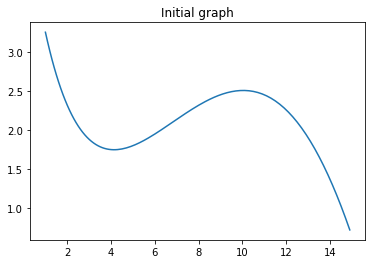

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [x/10. for x in range(10,150)]
y = [f(i) for i in x]

plt.plot(x, y)
plt.title('Initial graph')
plt.show()


## 2-points interpolation

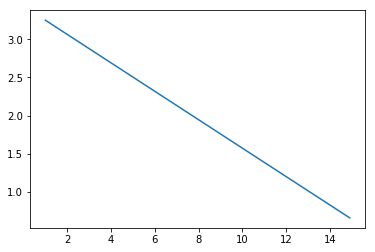

In [24]:
from scipy import linalg
m2 = np.array([[1, 1], [1, 15]])
b2 = np.array([f(1.), f(15.)])
x2 = linalg.solve(m2, b2)
f2 = lambda x: x2[0] + x2[1]*x
y2 = [f2(i) for i in x]
plt.plot(x, y2)

## 3-points interpolation

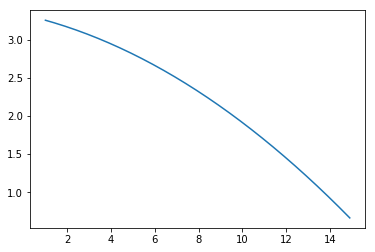

In [26]:
from scipy import linalg
m3 = np.array([[1, 1, 1], [1, 8, 8*8], [1, 15, 15*15]])
b3 = np.array([f(1.), f(8.), f(15.)])
x3 = linalg.solve(m3, b3)
f3 = lambda x: x3[0] + x3[1]*x + x3[2]*x*x
y3 = [f3(i) for i in x]
plt.plot(x, y3)

## 4-points interpolation

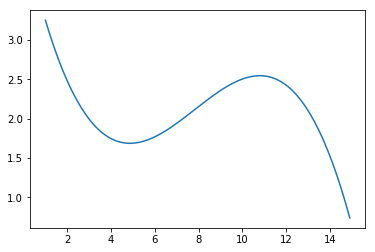

In [30]:
from scipy import linalg
m4 = np.array([[1, 1, 1, 1], [1, 4, 4*4, 4*4*4],
               [1, 10, 10*10, 10*10*10], [1, 15, 15*15, 15*15*15]])
b4 = np.array([f(1.), f(4.), f(10.), f(15.)])
x4 = linalg.solve(m4, b4)
f4 = lambda x: x4[0] + x4[1]*x + x4[2]*x*x + x4[3]*x*x*x
y4 = [f4(i) for i in x]
plt.plot(x, y4)

## Save to file

In [43]:
out_file2='G:\MYOWN\Oddcard2\education\Coursera\ML_Yandex\week2\submission-2.txt'
with open(out_file2, 'w') as f2:
    line = ' '.join(x4.astype(str))
    f2.write(line)